# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/singsang2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [65]:
heroes_df = pd.read_csv('heroes_information.csv', index_col=0)
powers_df = pd.read_csv('super_hero_powers.csv')

In [66]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [67]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [68]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [69]:
heroes_df.isna().sum().sort_values()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Skin color     0
Alignment      0
Weight         2
Publisher     15
dtype: int64

In [70]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Gorilla Grodd,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [71]:
powers_df.isna().sum().sort_values()

hero_names           0
Enhanced Smell       0
Illusions            0
Thirstokinesis       0
Hair Manipulation    0
                    ..
Summoning            0
Enhanced Memory      0
Reflexes             0
Element Control      0
Omniscient           0
Length: 168, dtype: int64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [72]:
heroes_df[heroes_df.duplicated()]
heroes_df.loc[heroes_df['name']=='Goliath']
#get rid of duplicate
heroes_df = heroes_df[~heroes_df.duplicated()]

In [73]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        733 non-null    object 
 1   Gender      733 non-null    object 
 2   Eye color   733 non-null    object 
 3   Race        733 non-null    object 
 4   Hair color  733 non-null    object 
 5   Height      733 non-null    float64
 6   Publisher   718 non-null    object 
 7   Skin color  733 non-null    object 
 8   Alignment   733 non-null    object 
 9   Weight      731 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.0+ KB


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Weight (lb)'),
 Text(0.5, 1.0, 'Heroes Weight Histogram')]

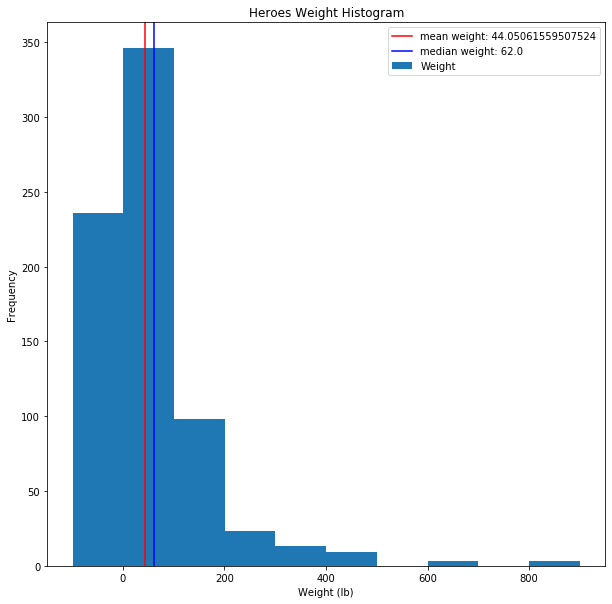

In [74]:
# Weight
fig = plt.figure(figsize=(10,10))
ax = heroes_df['Weight'].plot(kind='hist', bins=10)
heroes_mean = heroes_df['Weight'].mean()
heroes_median = heroes_df['Weight'].median()
ax.axvline(heroes_mean, color='red', label=f'mean weight: {heroes_mean}')
ax.axvline(heroes_median, color='blue', label=f'median weight: {heroes_median}')
ax.legend()
ax.set(xlabel='Weight (lb)', ylabel='Frequency', title='Heroes Weight Histogram')

In [75]:
# Changing NaN to median weights for 2 heroes
heroes_df.loc[heroes_df['Weight'].isna(), 'Weight'] = heroes_median
heroes_df.isna().sum().sort_values()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Skin color     0
Alignment      0
Weight         0
Publisher     15
dtype: int64

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Weight (lb)'),
 Text(0.5, 1.0, 'Heroes Weight Histogram')]

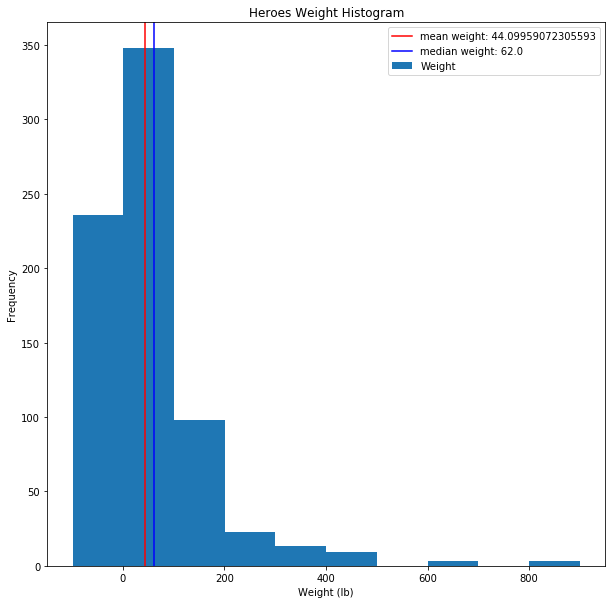

In [76]:
fig = plt.figure(figsize=(10,10))
ax = heroes_df['Weight'].plot(kind='hist', bins=10)
heroes_mean = heroes_df['Weight'].mean()
heroes_median = heroes_df['Weight'].median()
ax.axvline(heroes_mean, color='red', label=f'mean weight: {heroes_mean}')
ax.axvline(heroes_median, color='blue', label=f'median weight: {heroes_median}')
ax.legend()
ax.set(xlabel='Weight (lb)', ylabel='Frequency', title='Heroes Weight Histogram')
# Notice that the mean changes 'slightly'

In [90]:
indexes = list(heroes_df.loc[heroes_df['Publisher'].isna()].index)
indexes

[46, 86, 138, 175, 204, 244, 263, 286, 348, 354, 381, 389, 393, 542, 658]

In [91]:

heroes_df.loc[heroes_df['Publisher'].isna(), 'Publisher'] = '-' # placing a place holder!
heroes_df.iloc[indexes] #chekcing if NaN got replaced by '-'

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,-,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,-,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,-,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,-,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,-,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,-,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,-,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,-,grey,bad,62.0
349,Jack of Hearts,Male,blue / white,Human,Brown,155.0,Marvel Comics,-,good,79.0
355,Jean Grey,Female,green,Mutant,Red,168.0,Marvel Comics,-,good,52.0


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [102]:
powers_df.describe()
powers_df.duplicated(subset='hero_names').sum()

0

In [126]:
heroes_df[heroes_df.duplicated(subset='name')]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0
97,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0
116,Blizzard,Male,-,-,Brown,-99.0,Marvel Comics,-,bad,-99.0
123,Blue Beetle,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0
260,Firestorm,Male,blue,Human,Auburn,188.0,DC Comics,-,good,91.0


In [125]:
powers_df.loc[powers_df['hero_names']=='Angel']
powers_df.iloc[24]

hero_names               Angela
Agility                   False
Accelerated Healing       False
Lantern Power Ring        False
Dimensional Awareness     False
                          ...  
Phoenix Force             False
Molecular Dissipation     False
Vision - Cryo             False
Omnipresent               False
Omniscient                False
Name: 24, Length: 168, dtype: object

In [129]:
heroes_df.set_index('name',inplace=True)


KeyError: "None of ['name'] are in the columns"

In [133]:
powers_df.set_index('hero_names', inplace=True)

In [135]:
heroes_df.join(powers_df, how='left').iloc[[22,23],10:20]


,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing
Angel,True,False,False,False,True,True,False,True,False,False
Angel,True,False,False,False,True,True,False,True,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

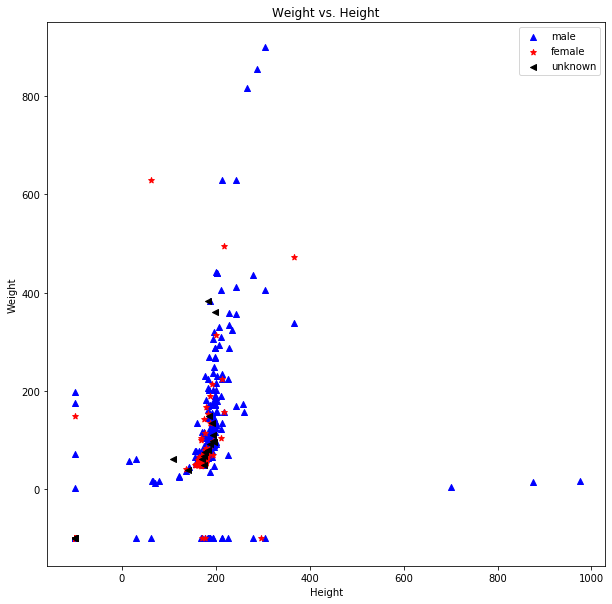

In [163]:
# matplotlib way
males = heroes_df.loc[heroes_df['Gender']=='Male']
females = heroes_df.loc[heroes_df['Gender']=='Female']
unknowns = heroes_df.loc[heroes_df['Gender']=='-']


figure = plt.figure(figsize=(10,10))
plt.scatter(males['Height'], males['Weight'], color='blue', marker='^', label='male')
plt.scatter(females['Height'], females['Weight'], color='red', marker='*', label='female')
plt.scatter(unknowns['Height'], unknowns['Weight'], color='black', marker='<', label='unknown')
plt.xlabel('Height') 
plt.ylabel('Weight') 
plt.title('Weight vs. Height')
plt.legend()

Text(0.5, 1.0, 'Weight vs Height')

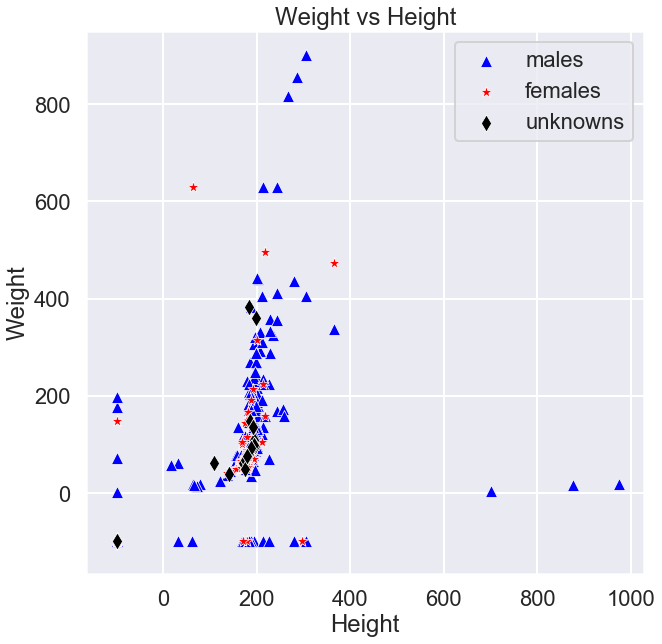

In [190]:
# sns way
fig = plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.set_context('poster')
sns.scatterplot(x='Height', y='Weight', color='blue', marker='^',label='males', data=males)
sns.scatterplot(x='Height', y='Weight', color='red', marker='*',label='females', data=females)
sns.scatterplot(x='Height', y='Weight', color='black', marker='d',label='unknowns', data=unknowns)
plt.title('Weight vs Height')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [205]:
male_heroes_df = males
female_heroes_df = females

def show_distplot(dataframe, gender, column_name):
    #import seaborn as sns
    if gender in ['Male', 'Female']:
        data = dataframe.loc[dataframe['Gender']==gender]
        if column_name in list(data.columns):
            sns.distplot(data[column_name])
            plt.title(f'{gender} {column_name} histogram')
            
        else:
            print('Invalid Column Name. The following are available column names you can choose from:\n{}'.format(list(data.columns)))
    else:
        print('Invalid Gender. Please choose either \'mMle\' or \'Female\'.')
    

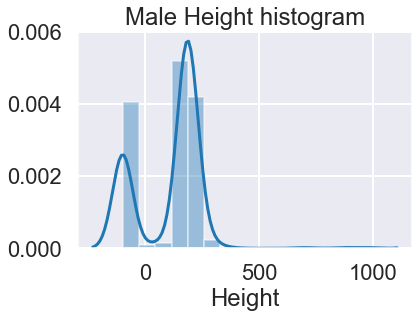

In [206]:
# Male Height
show_distplot(heroes_df, 'Male', 'Height')

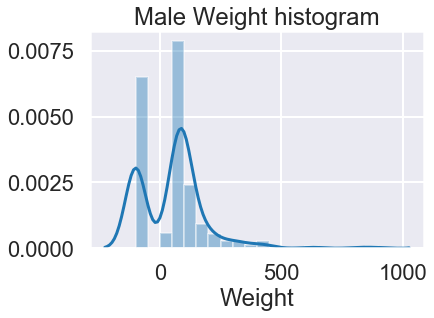

In [207]:
# Male Weight
show_distplot(heroes_df, 'Male', 'Weight')

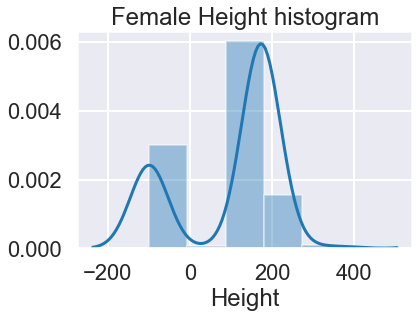

In [208]:
# Female Height
show_distplot(heroes_df, 'Female', 'Height')

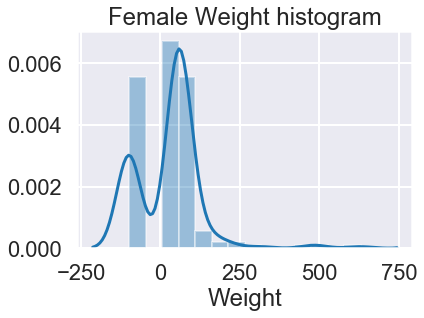

In [209]:
# Female Weight
show_distplot(heroes_df, 'Female', 'Weight')

Requirement already up-to-date: seaborn in /Users/singsang2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.10.1)


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data